# **Cat Diseases**
---

## **List of Diseases:**
1. **Panleukopenia**: Penyakit virus yang sangat menular pada kucing, menyebabkan gejala seperti muntah, diare, kehilangan nafsu makan, dan demam.

2. **Scabies**: Infestasi kutu yang menyebabkan gatal parah, iritasi kulit, kerontokan rambut, dan lesi kulit pada kucing.

3. **Enteritis**: Peradangan usus pada kucing yang sering disebabkan oleh infeksi virus atau bakteri, dengan gejala termasuk muntah, diare, dehidrasi, dan kelemahan.

4. **Feline Calicivirus (FCV)**: Virus umum yang menyebabkan penyakit pernapasan pada kucing, dengan gejala seperti pilek, demam, sakit tenggorokan, dan ulserasi mulut atau lidah.

## **List of Symptoms:**
1. **Anoreksia**: Kehilangan nafsu makan atau penurunan berat badan yang signifikan.
2. **Muntah**: Proses pengeluaran isi lambung melalui mulut.
3. **Kelemahan**: Kehilangan kekuatan atau energi fisik yang berlebihan.
4. **Kurang responsif**: Kehilangan kemampuan untuk merespons rangsangan atau interaksi eksternal secara normal.
5. **Dehidrasi**: Kekurangan cairan dalam tubuh, seringkali disertai dengan kulit kering, bibir pecah-pecah, dan urin berwarna gelap.
6. **Demam**: Kenaikan suhu tubuh di atas normal.
7. **Diare**: Pengeluaran tinja yang encer dan sering.
8. **Hipersevalis**: Produksi cairan tubuh secara berlebihan.
9. **Radang telinga**: Peradangan pada telinga yang seringkali disertai rasa sakit atau gangguan pendengaran.
10. **Batuk**: Proses ekshalasi yang kuat dan involunter untuk membersihkan jalan napas.
11. **Hidung meler**: Pengeluaran lendir dari hidung.
12. **Gatal**: Sensasi tidak nyaman yang memicu dorongan untuk menggaruk.
13. **Telinga keropeng**: Kondisi di mana kulit telinga mengalami pengelupasan atau pengerasan.
14. **Pilek**: Kondisi umum yang ditandai dengan hidung tersumbat atau berair.
15. **Bersin-bersin**: Respon alami tubuh untuk mengeluarkan iritasi atau zat asing dari hidung.
16. **Mata berair**: Kondisi di mana mata mengeluarkan air mata lebih dari biasanya, bisa disebabkan oleh alergi atau infeksi.

## **Import Library**

In [ ]:
!pip install tensorflowjs
!pip install TensorFlow==2.15.0
!pip install tensorflow-decision-forests==1.8.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

import json
from tensorflow.python.keras.models import model_from_json
from tensorflow.keras.models import save_model

import tensorflowjs as tfjs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Import Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/Capstone/cat_diseases_data.csv')
df.head()

,anorexia,muntah,lemah,kurang respon,dehidrasi,demam,diare,hipersevalis,radang telinga,batuk,hidung meler,gatal,telinga keropeng,pilek,bersin2,mata berair,penyakit
0,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,panleukopenia
1,Yes,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,panleukopenia
2,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,panleukopenia
3,No,No,Yes,No,No,No,Yes,No,No,No,No,No,No,No,No,No,panleukopenia
4,No,Yes,Yes,No,No,No,Yes,No,No,No,No,No,No,No,No,No,panleukopenia


## **Drop Scabies**

In [ ]:
df['penyakit'].unique()

array(['panleukopenia', 'scabies', 'enteritis', 'fcv'], dtype=object)

In [ ]:
df_new = df[df['penyakit'] != 'scabies']
df_new['penyakit'].unique()

array(['panleukopenia', 'enteritis', 'fcv'], dtype=object)

## **Drop Features That Users Can't See**

In [ ]:
df.columns

Index(['anorexia', 'muntah', 'lemah', 'kurang respon', 'dehidrasi', 'demam',
       'diare', 'hipersevalis', 'radang telinga', 'batuk', 'hidung meler',
       'gatal', 'telinga keropeng', 'pilek', 'bersin2', 'mata berair',
       'penyakit'],
      dtype='object')

In [ ]:
drop_features = ['hipersevalis', 'radang telinga', 'dehidrasi']

df_new = df_new.drop(columns=drop_features)
df_new.columns

Index(['anorexia', 'muntah', 'lemah', 'kurang respon', 'demam', 'diare',
       'batuk', 'hidung meler', 'gatal', 'telinga keropeng', 'pilek',
       'bersin2', 'mata berair', 'penyakit'],
      dtype='object')

## **Add Healthy Data**

In [ ]:
df_new['penyakit'].value_counts()

penyakit
panleukopenia    89
fcv              16
enteritis        11
Name: count, dtype: int64

In [ ]:
df_healthy = pd.DataFrame(index=range(20), columns=df_new.columns)

df_healthy.fillna('No', inplace=True)

df_healthy['penyakit'] = 'sehat'
df_healthy.head()

,anorexia,muntah,lemah,kurang respon,demam,diare,batuk,hidung meler,gatal,telinga keropeng,pilek,bersin2,mata berair,penyakit
0,No,No,No,No,No,No,No,No,No,No,No,No,No,sehat
1,No,No,No,No,No,No,No,No,No,No,No,No,No,sehat
2,No,No,No,No,No,No,No,No,No,No,No,No,No,sehat
3,No,No,No,No,No,No,No,No,No,No,No,No,No,sehat
4,No,No,No,No,No,No,No,No,No,No,No,No,No,sehat


In [ ]:
df_merged = pd.concat([df_new, df_healthy], ignore_index=True).reset_index(drop=True)
df_merged

,anorexia,muntah,lemah,kurang respon,demam,diare,batuk,hidung meler,gatal,telinga keropeng,pilek,bersin2,mata berair,penyakit
0,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,panleukopenia
1,Yes,No,No,No,Yes,No,No,No,No,No,No,No,No,panleukopenia
2,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,panleukopenia
3,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,panleukopenia
4,No,Yes,Yes,No,No,Yes,No,No,No,No,No,No,No,panleukopenia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,No,No,No,No,No,No,No,No,No,No,No,No,No,sehat
132,No,No,No,No,No,No,No,No,No,No,No,No,No,sehat
133,No,No,No,No,No,No,No,No,No,No,No,No,No,sehat
134,No,No,No,No,No,No,No,No,No,No,No,No,No,sehat


## **Label Encoding**

In [ ]:
mapping = {'No': 0, 'Yes': 1}
map_col = ['anorexia', 'muntah', 'lemah', 'kurang respon', 'demam', 'diare', 'batuk', 'hidung meler', 'gatal',
           'telinga keropeng', 'pilek', 'bersin2', 'mata berair']

for col in map_col:
    df_merged[col] = df_merged[col].replace(mapping)

In [ ]:
object_columns = ['penyakit']
label_encoder = preprocessing.LabelEncoder()

df_enc = df_merged.copy()
for col in object_columns:
    df_enc[col] = label_encoder.fit_transform(df_enc[col])

df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   anorexia          136 non-null    int64
 1   muntah            136 non-null    int64
 2   lemah             136 non-null    int64
 3   kurang respon     136 non-null    int64
 4   demam             136 non-null    int64
 5   diare             136 non-null    int64
 6   batuk             136 non-null    int64
 7   hidung meler      136 non-null    int64
 8   gatal             136 non-null    int64
 9   telinga keropeng  136 non-null    int64
 10  pilek             136 non-null    int64
 11  bersin2           136 non-null    int64
 12  mata berair       136 non-null    int64
 13  penyakit          136 non-null    int64
dtypes: int64(14)
memory usage: 15.0 KB


In [ ]:
for col in object_columns:
    class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(f"Label encoding mapping for '{col}':")
    for category, code in class_mapping.items():
        print(f"  {code}: {category}")

df_enc.head()

Label encoding mapping for 'penyakit':
  0: enteritis
  1: fcv
  2: panleukopenia
  3: sehat


,anorexia,muntah,lemah,kurang respon,demam,diare,batuk,hidung meler,gatal,telinga keropeng,pilek,bersin2,mata berair,penyakit
0,1,1,1,1,0,0,0,0,0,0,0,0,0,2
1,1,0,0,0,1,0,0,0,0,0,0,0,0,2
2,1,1,1,0,0,0,0,0,0,0,0,0,0,2
3,0,0,1,0,0,1,0,0,0,0,0,0,0,2
4,0,1,1,0,0,1,0,0,0,0,0,0,0,2


## **Resampling**

### **Oversampling**

In [ ]:
desired_samples_per_class = 2000
df_oversampled = pd.DataFrame()

for class_label in df_enc['penyakit'].unique():
    class_data = df_enc[df_enc['penyakit'] == class_label]

    if len(class_data) < desired_samples_per_class:
        oversampled_data = resample(class_data, replace=True, n_samples=desired_samples_per_class, random_state=42)
        df_oversampled = pd.concat([df_oversampled, oversampled_data])
    else:
        sampled_data = class_data.sample(n=desired_samples_per_class, random_state=42)
        df_oversampled = pd.concat([df_oversampled, sampled_data])

df_samp = df_oversampled.copy()
df_oversampled['penyakit'].value_counts()

penyakit
2    2000
0    2000
1    2000
3    2000
Name: count, dtype: int64

In [ ]:
# df_oversampled

### **Undersampling**

In [ ]:
# minority_class_count = 11
# majority_class = df_enc['penyakit'].value_counts().idxmax()
# minority_class = df_enc['penyakit'].value_counts().idxmin()

# df_undersampled = pd.DataFrame()

# for class_name in df_enc['penyakit'].unique():
#     if class_name == minority_class:
#         df_minority_class = df_enc[df_enc['penyakit'] == class_name].sample(minority_class_count)
#         df_undersampled = pd.concat([df_undersampled, df_minority_class])
#     else:
#         df_majority_class = df_enc[df_enc['penyakit'] == class_name].sample(minority_class_count)
#         df_undersampled = pd.concat([df_undersampled, df_majority_class])

# df_samp = df_undersampled.copy()
# df_undersampled['penyakit'].value_counts()

In [ ]:
# df_undersampled

## **Feature Selection Using Correlation**

In [ ]:
# df_samp = df_enc.copy()
correlation = df_samp.corr()

dis_corr = correlation['penyakit']
dis_corr = dis_corr[abs(dis_corr) > 0]
dis_corr_sorted = dis_corr.nlargest(10)
dis_corr_sorted

penyakit         1.000000
anorexia         0.113313
kurang respon    0.086267
muntah           0.037236
demam            0.030479
lemah           -0.025921
mata berair     -0.080488
pilek           -0.132324
batuk           -0.135916
hidung meler    -0.147240
Name: penyakit, dtype: float64

In [ ]:
selected_columns = dis_corr_sorted.index.tolist()
selected_columns.append('diare')
selected_columns

['penyakit',
 'anorexia',
 'kurang respon',
 'muntah',
 'demam',
 'lemah',
 'mata berair',
 'pilek',
 'batuk',
 'hidung meler',
 'diare']

In [ ]:
df_fix = df_samp.copy()
df_fix = df_fix[selected_columns]
df_fix.head()

,penyakit,anorexia,kurang respon,muntah,demam,lemah,mata berair,pilek,batuk,hidung meler,diare
51,2,1,0,0,0,1,0,0,0,0,0
14,2,0,0,0,0,1,0,0,0,0,0
71,2,1,0,0,1,1,0,0,0,0,0
60,2,1,0,0,0,1,0,0,0,0,1
20,2,0,0,1,0,1,0,0,0,0,0


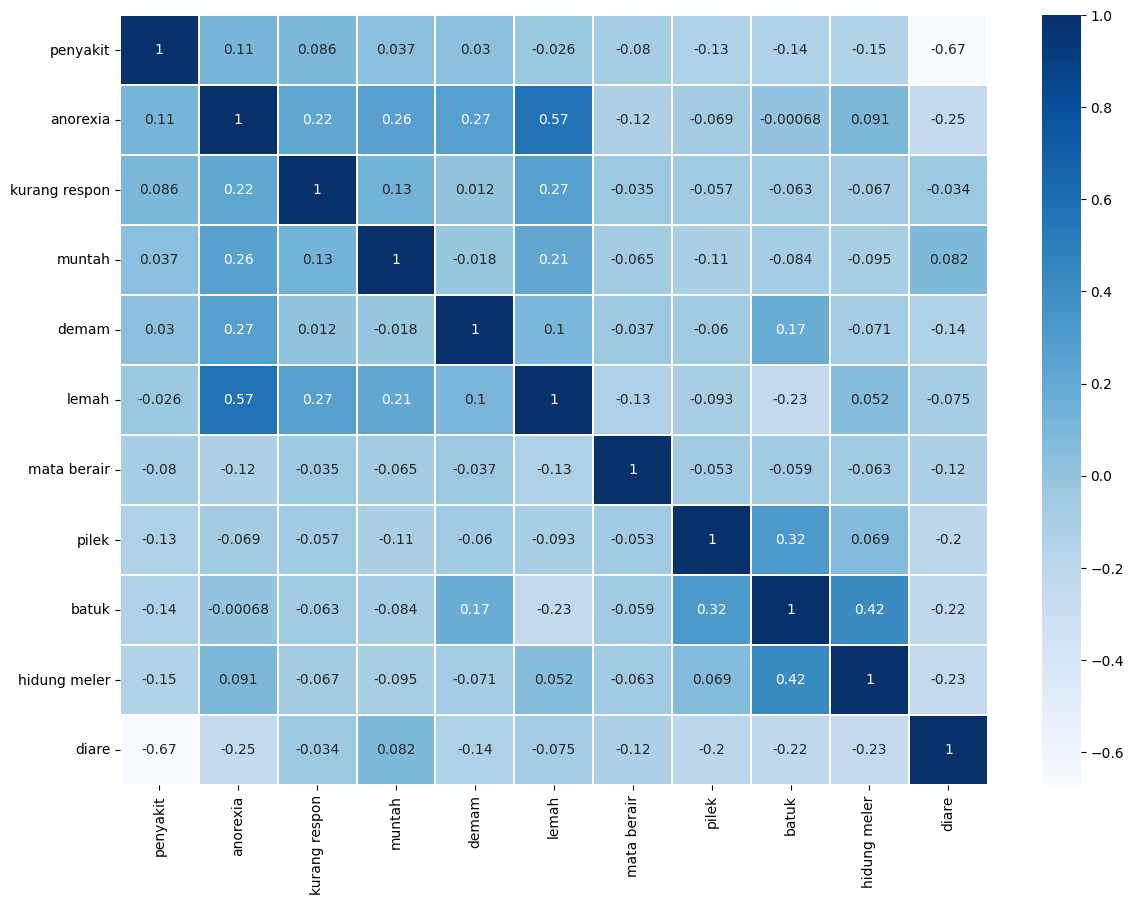

In [ ]:
sns.heatmap(df_fix.corr(), annot=True, cmap='Blues', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(14, 10)
plt.show()

## **Split Data**

In [ ]:
X = df_fix.drop(columns=['penyakit'])
y = df_fix['penyakit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

## **Modeling**

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
num_features = X_train.shape[1]
num_classes = len(np.unique(y_train))

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(num_features,)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(num_classes, activation='softmax')
])

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/20
200/200 [==============================] - 2s 5ms/step - loss: 0.7537 - accuracy: 0.8150 - val_loss: 0.2126 - val_accuracy: 0.9700
Epoch 2/20
200/200 [==============================] - 1s 4ms/step - loss: 0.2138 - accuracy: 0.9425 - val_loss: 0.0944 - val_accuracy: 0.9700
Epoch 3/20
200/200 [==============================] - 1s 4ms/step - loss: 0.1430 - accuracy: 0.9503 - val_loss: 0.0825 - val_accuracy: 0.9712
Epoch 4/20
200/200 [==============================] - 1s 4ms/step - loss: 0.1206 - accuracy: 0.9561 - val_loss: 0.0805 - val_accuracy: 0.9712
Epoch 5/20
200/200 [==============================] - 1s 3ms/step - loss: 0.1094 - accuracy: 0.9584 - val_loss: 0.0751 - val_accuracy: 0.9712
Epoch 6/20
200/200 [==============================] - 1s 4ms/step - loss: 0.1046 - accuracy: 0.9588 - val_loss: 0.0749 - val_accuracy: 0.9712
Epoch 7/20
200/200 [==============================] - 1s 3ms/step - loss: 0.0990 - accuracy: 0.9603 - val_loss: 0.0729 - val_accuracy: 0.9712
Epoch 

In [ ]:
X_test

,anorexia,kurang respon,muntah,demam,lemah,mata berair,pilek,batuk,hidung meler,diare
56,1,1,0,0,1,0,0,0,0,0
90,0,0,1,0,0,0,0,0,0,1
22,1,0,0,0,0,0,0,0,0,0
63,1,0,1,0,1,0,0,0,0,0
93,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
91,0,0,0,0,1,0,0,0,0,1
104,1,0,0,0,1,0,0,0,0,0
94,0,0,0,0,0,0,0,0,0,1
97,0,0,0,0,1,0,0,0,0,1


In [ ]:
unique_categories = sorted(set(label_encoder.classes_))
encoded_array = list(unique_categories)
encoded_array

['enteritis', 'fcv', 'panleukopenia', 'sehat']

25/25 [==============================] - 0s 3ms/step


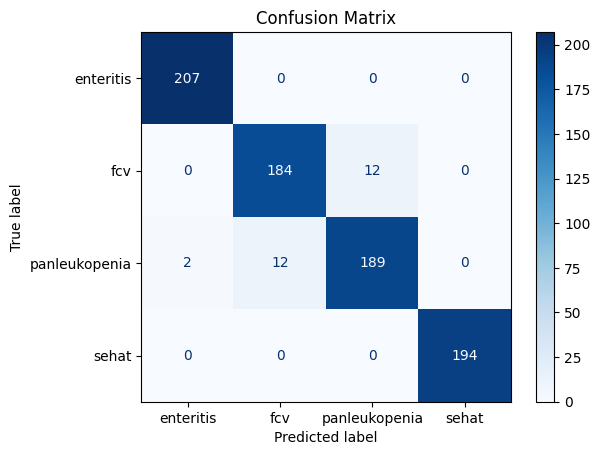

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoded_array)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# !pip install catboost
# from catboost import CatBoostClassifier
# from sklearn.metrics import accuracy_score

# model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, loss_function='MultiClass')

# model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50, verbose=100)

# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

In [ ]:
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score

# model = XGBClassifier(iterations=2000, learning_rate=0.1)

# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

## **Save Model**

### **H5**

In [ ]:
os.makedirs('model/h5/', exist_ok=True)

save_model(model, "model/h5/model.h5")

<ipython-input-31-6526dd724935>:3: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, "model/h5/model.h5")


### **HDF5**

In [ ]:
os.makedirs('model/hdf5/', exist_ok=True)

json_model = model.to_json()
with open('model/hdf5/cat_diseases_model.json', 'w') as json_file:
    json_file.write(json_model)

model.save_weights('model/hdf5/cat_diseases_weights.weights.h5')

In [ ]:
folder = "hdf5/"

with open(f'model/{folder}cat_diseases_model.json', 'r') as json_file:
    loaded_model_json = json_file.read()
    test_model = tf.keras.models.model_from_json(loaded_model_json)

test_model.load_weights(f'model/{folder}cat_diseases_weights.weights.h5')

test_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

In [ ]:
model_pred = test_model.predict(np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]))
y_pred_class = np.argmax(model_pred, axis=1)
print(model_pred)
print("Class:", y_pred_class)

1/1 [==============================] - 9s 9s/step
[[8.1013098e-07 9.0648984e-07 4.3389909e-07 9.9999785e-01]]
Class: [3]


### **TFJS**

In [ ]:
tfjs.converters.save_keras_model(model, "model/tfjs/")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
